# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../../wholesale_data.csv')

# Display the first few rows of the dataset
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


**COMPLETE THE REQUIRED TASKS:**


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

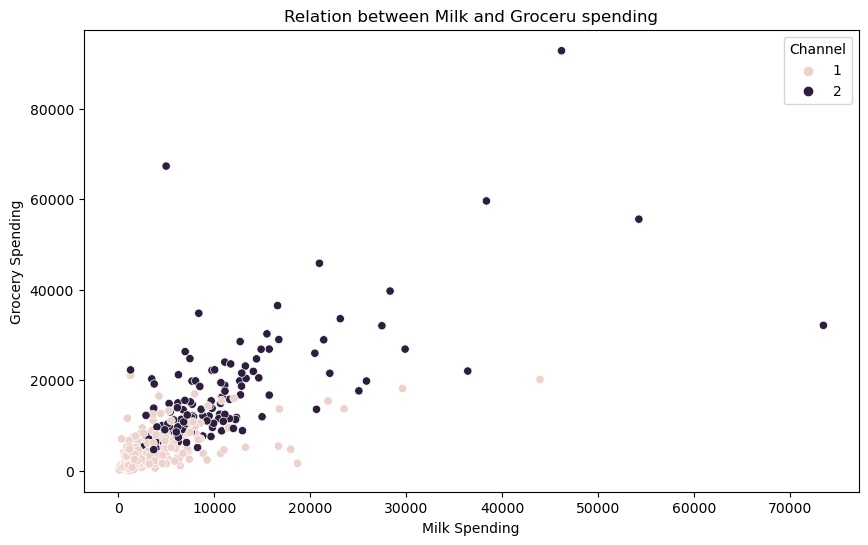

In [2]:
# Create the scatterplot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Milk', y='Grocery', hue='Channel', data=data)

# Add title and labels
scatter_plot.set_title('Relation between Milk and Groceru spending')
scatter_plot.set_xlabel('Milk Spending')
scatter_plot.set_ylabel('Grocery Spending')

# Show the plot
plt.legend(title='Channel')
plt.show()

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

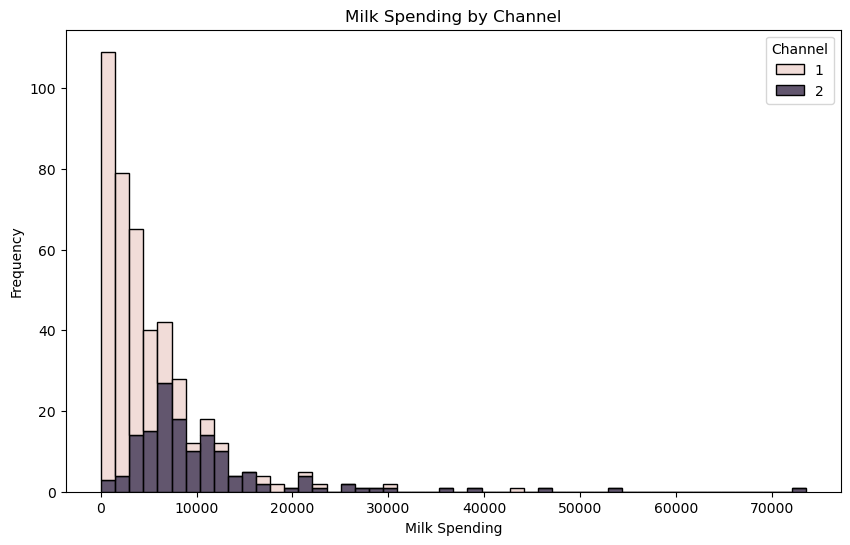

In [3]:
# Create the stacked histogram
plt.figure(figsize=(10, 6))
stacked_hist = sns.histplot(data=data, x='Milk', hue='Channel', multiple='stack')

# Add title and labels
stacked_hist.set_title('Milk Spending by Channel')
stacked_hist.set_xlabel('Milk Spending')
stacked_hist.set_ylabel('Frequency')

# Show the plot
plt.show()

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

<Figure size 1000x800 with 0 Axes>

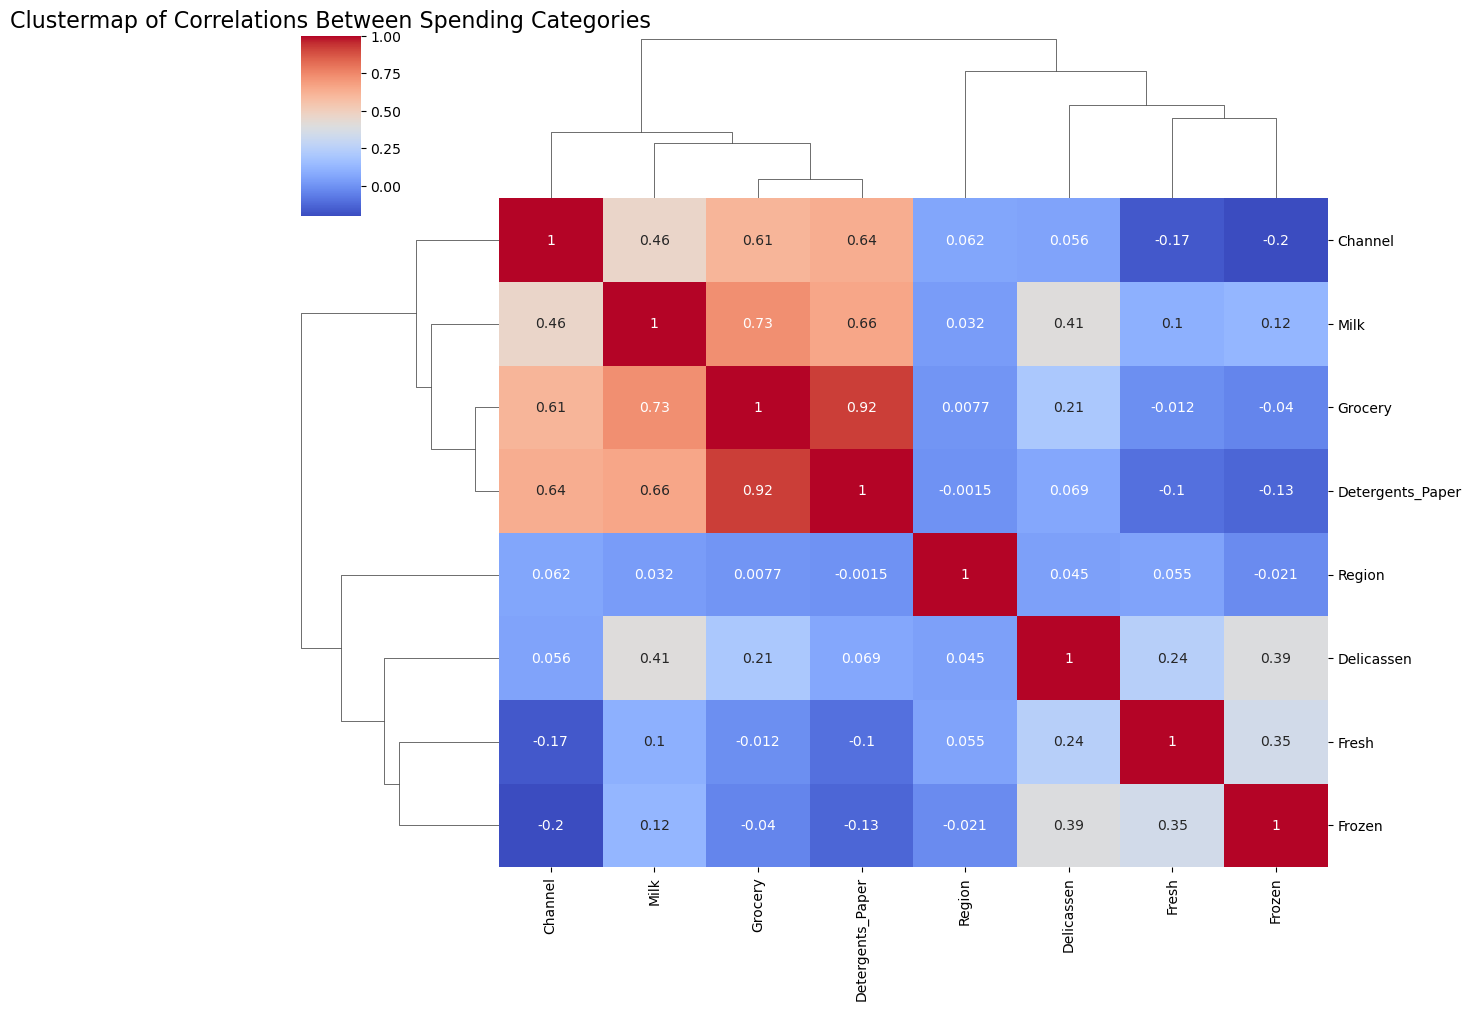

In [4]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
clustermap = sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', figsize=(12, 10))
plt.title('Clustermap of Correlations Between Spending Categories', size=16)
plt.show()

**TASK: Create a PairPlot of the dataframe, colored by Region.**

C:\Users\raymo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


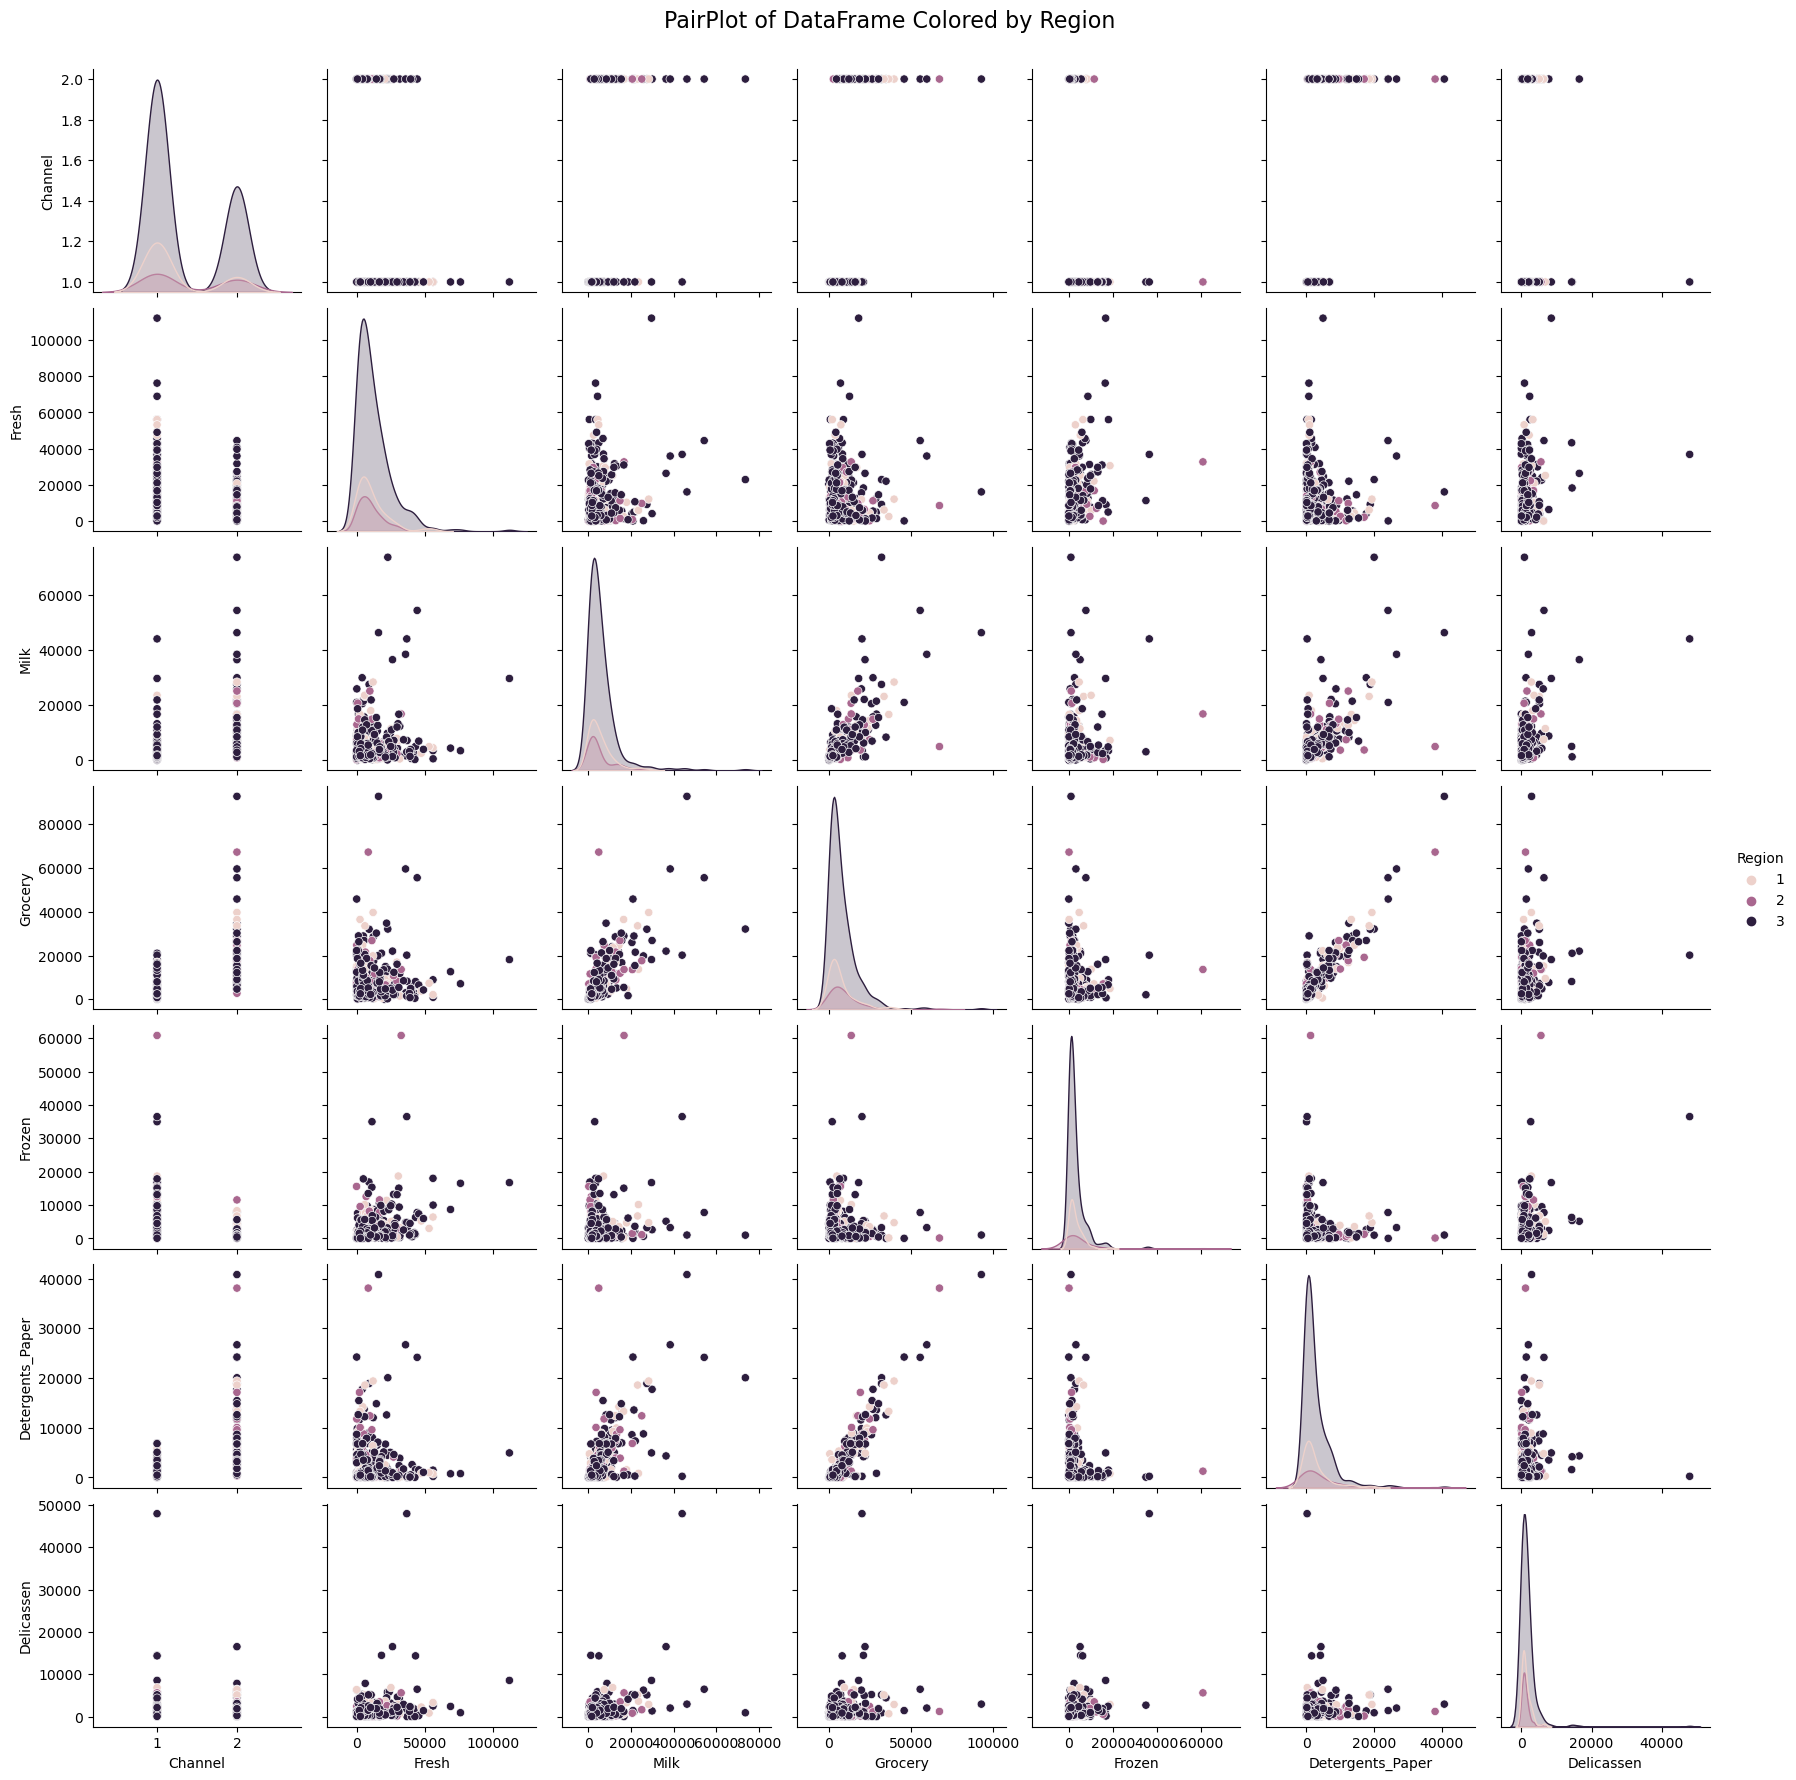

In [5]:
pairplot = sns.pairplot(data, hue='Region')

# Add a title to the pairplot
plt.suptitle('PairPlot of DataFrame Colored by Region', size=16, y=1.02)

# Show the plot
plt.show()

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


C:\Users\raymo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


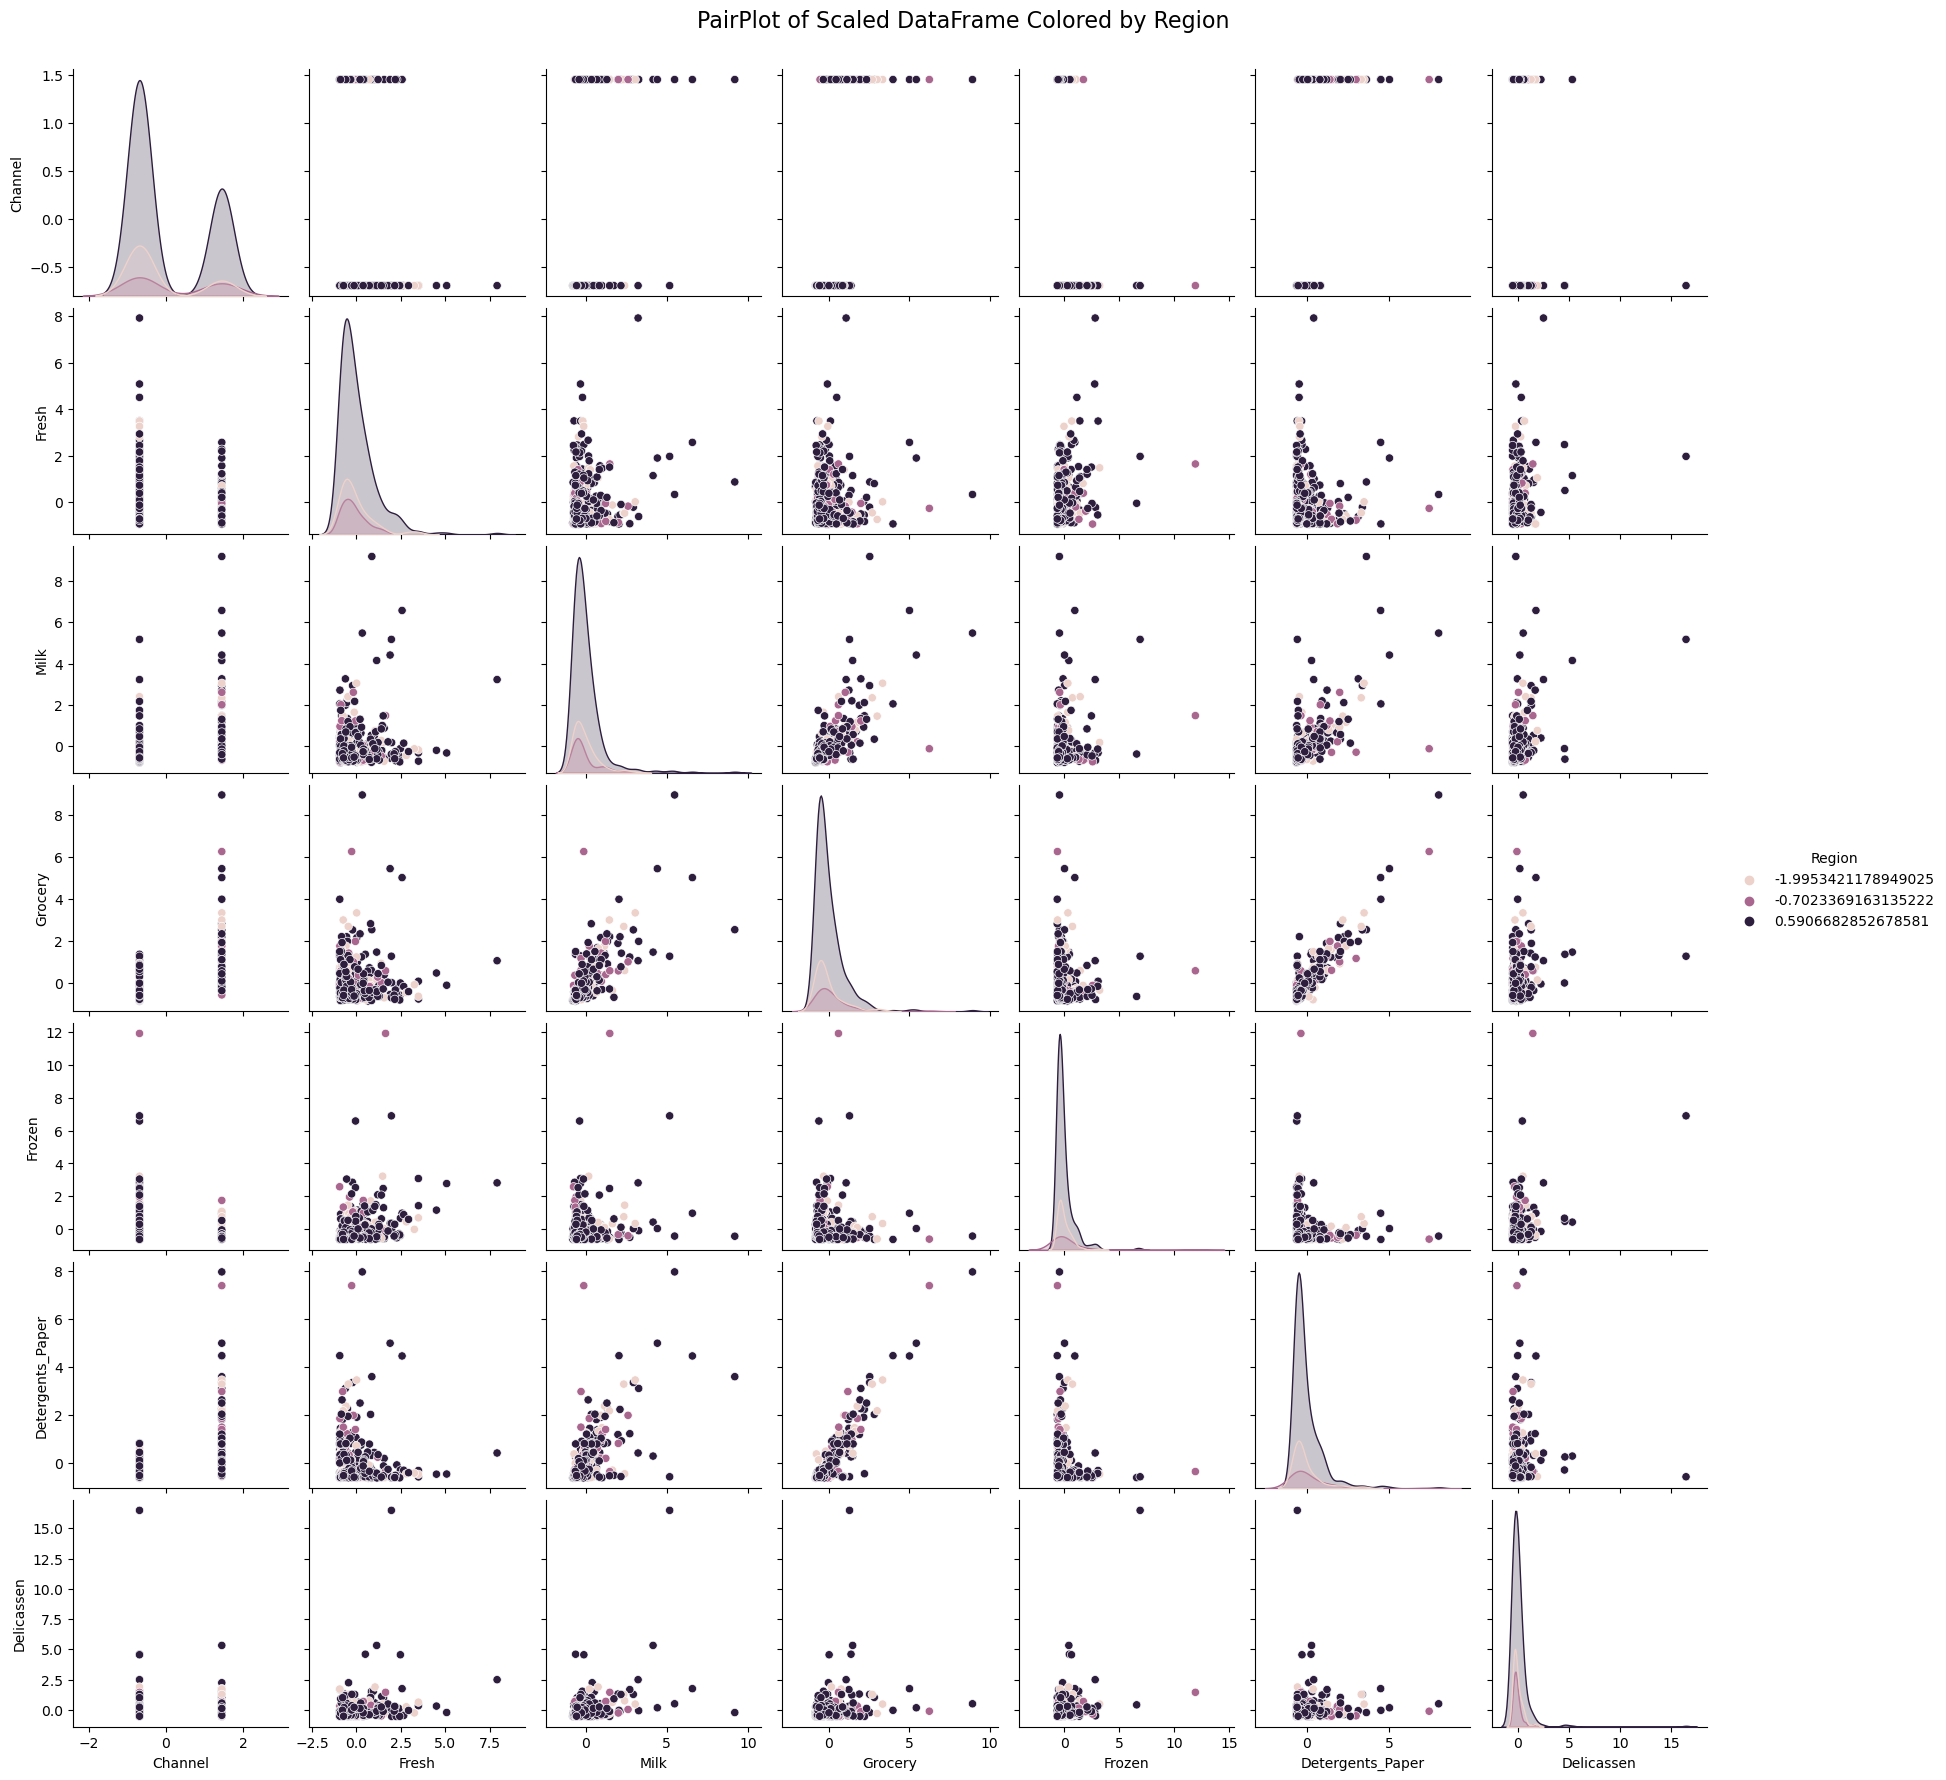

In [6]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns to scale
numeric_columns = data.select_dtypes(include='number').columns

# Scale the numeric features using StandardScaler
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the first few rows of the scaled dataset
print(data.head())

# Create the pairplot
pairplot = sns.pairplot(data, hue='Region')

# Add a title to the pairplot
plt.suptitle('PairPlot of Scaled DataFrame Colored by Region', size=16, y=1.02)

# Show the plot
plt.show()

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [7]:
import numpy as np
from sklearn.cluster import DBSCAN

# Number of features
n_features = len(numeric_columns)

# Range of epsilon values to test
epsilon_values = np.linspace(0.001, 3, 50)

# List to store the percentage of outliers for each epsilon
outlier_percentages = []

# DBSCAN clustering with different epsilon values
for epsilon in epsilon_values:
    # Create DBSCAN model
    dbscan = DBSCAN(eps=epsilon, min_samples=2 * n_features)
    
    # Fit the model
    dbscan.fit(data[numeric_columns])
    
    # Identify outliers (points labeled as -1)
    outliers = (dbscan.labels_ == -1)
    
    # Calculate the percentage of outliers
    percentage_outliers = np.sum(outliers) / len(data) * 100
    
    # Append the result to the list
    outlier_percentages.append(percentage_outliers)
    
    # Log the epsilon and the percentage of outliers
    print(f"Epsilon: {epsilon:.3f}, Percentage of outliers: {percentage_outliers:.2f}%")



Epsilon: 0.001, Percentage of outliers: 100.00%
Epsilon: 0.062, Percentage of outliers: 100.00%
Epsilon: 0.123, Percentage of outliers: 100.00%
Epsilon: 0.185, Percentage of outliers: 100.00%
Epsilon: 0.246, Percentage of outliers: 100.00%
Epsilon: 0.307, Percentage of outliers: 96.14%
Epsilon: 0.368, Percentage of outliers: 85.68%
Epsilon: 0.429, Percentage of outliers: 81.82%
Epsilon: 0.491, Percentage of outliers: 76.36%
Epsilon: 0.552, Percentage of outliers: 73.64%
Epsilon: 0.613, Percentage of outliers: 70.45%
Epsilon: 0.674, Percentage of outliers: 65.00%
Epsilon: 0.735, Percentage of outliers: 56.82%
Epsilon: 0.797, Percentage of outliers: 47.95%
Epsilon: 0.858, Percentage of outliers: 39.55%
Epsilon: 0.919, Percentage of outliers: 32.50%
Epsilon: 0.980, Percentage of outliers: 27.95%
Epsilon: 1.041, Percentage of outliers: 24.55%
Epsilon: 1.103, Percentage of outliers: 22.27%
Epsilon: 1.164, Percentage of outliers: 20.91%
Epsilon: 1.225, Percentage of outliers: 20.23%
Epsilon:

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

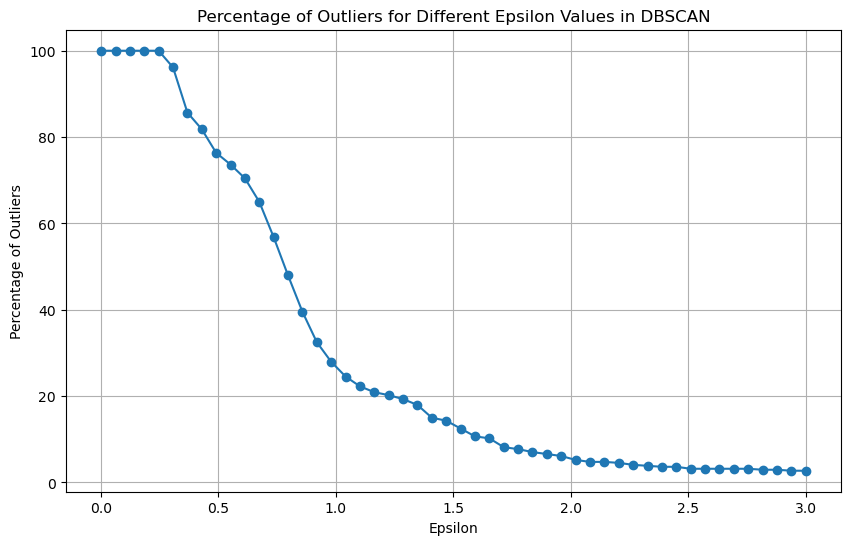

In [8]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, outlier_percentages, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Percentage of Outliers')
plt.title('Percentage of Outliers for Different Epsilon Values in DBSCAN')
plt.grid(True)
plt.show()

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

Percentage of outliers: 5.68%


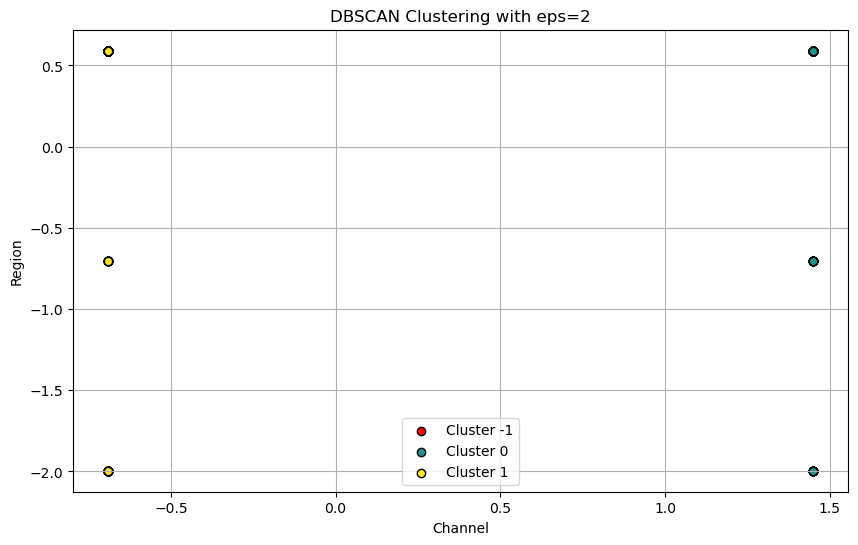

In [9]:
dbscan = DBSCAN(eps=2, min_samples=2 * n_features)
dbscan.fit(data[numeric_columns])

# Add the cluster labels to the original dataset
data['Cluster'] = dbscan.labels_

# Identify the outliers
outliers = data['Cluster'] == -1
percentage_outliers = np.sum(outliers) / len(data) * 100

# Log the percentage of outliers
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_labels = np.unique(dbscan.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'red'  # Red for outliers
    mask = data['Cluster'] == label
    plt.scatter(data.loc[mask, numeric_columns[0]], data.loc[mask, numeric_columns[1]], c=[color], label=f'Cluster {label}', edgecolors='k')

plt.xlabel(numeric_columns[0])
plt.ylabel(numeric_columns[1])
plt.title('DBSCAN Clustering with eps=2')
plt.legend()
plt.grid(True)
plt.show()

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

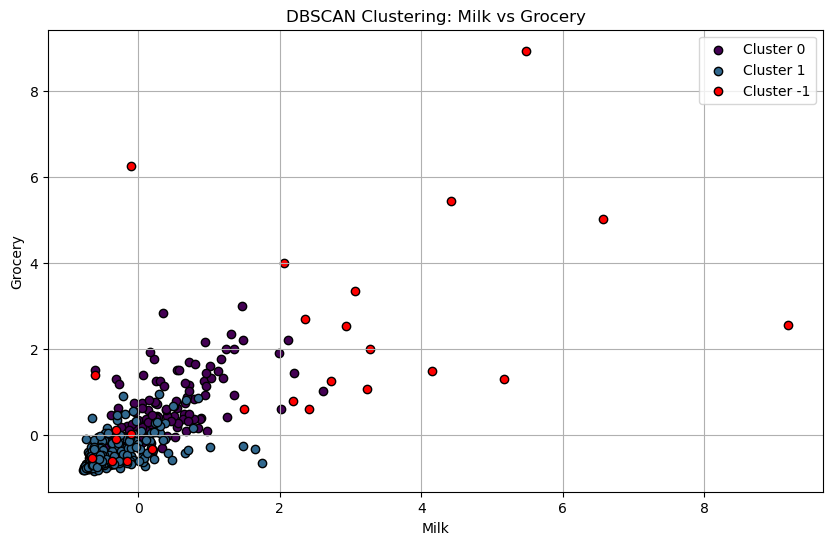

In [10]:
plt.figure(figsize=(10, 6))
labels = data['Cluster'].unique()
for label in labels:
    if label == -1:
        color = 'red'  # Red for outliers
    else:
        color = plt.cm.viridis(label / len(labels))  # Color based on label
    mask = data['Cluster'] == label
    plt.scatter(data.loc[mask, 'Milk'], data.loc[mask, 'Grocery'], c=[color], label=f'Cluster {label}', edgecolors='k')

plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('DBSCAN Clustering: Milk vs Grocery')
plt.legend()
plt.grid(True)
plt.show()

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

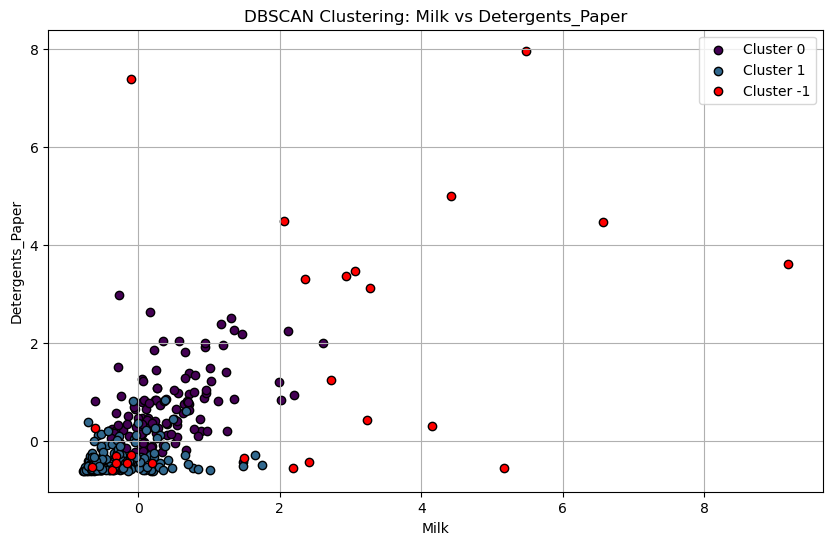

In [11]:
plt.figure(figsize=(10, 6))
for label in labels:
    if label == -1:
        color = 'red'  # Red for outliers
    else:
        color = plt.cm.viridis(label / len(labels))  # Color based on label
    mask = data['Cluster'] == label
    plt.scatter(data.loc[mask, 'Milk'], data.loc[mask, 'Detergents_Paper'], c=[color], label=f'Cluster {label}', edgecolors='k')

plt.xlabel('Milk')
plt.ylabel('Detergents_Paper')
plt.title('DBSCAN Clustering: Milk vs Detergents_Paper')
plt.legend()
plt.grid(True)
plt.show()

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [12]:
data['Labels'] = dbscan.labels_

# Display the updated DataFrame with the "Labels" column
print(data.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  Cluster  Labels  
0         -0.043569   -0.066339        0       0  
1          0.086407    0.089151        0       0  
2          0.133232    2.243293        0       0  
3         -0.498588    0.093411        1       1  
4         -0.231918    1.299347        0       0  


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [13]:
clusters = data[data['Labels'] != -1]  # Main clusters
outliers = data[data['Labels'] == -1]  # Outliers

# Calculate the mean spending amounts for each group
mean_clusters = clusters[numeric_columns].mean()
mean_outliers = outliers[numeric_columns].mean()

# Print the mean spending amounts
print("Mean Spending Amounts for Clusters:")
print(mean_clusters)
print("\nMean Spending Amounts for Outliers:")
print(mean_outliers)

Mean Spending Amounts for Clusters:
Channel            -0.025419
Region              0.004921
Fresh              -0.075008
Milk               -0.140312
Grocery            -0.118411
Frozen             -0.102088
Detergents_Paper   -0.104888
Delicassen         -0.110826
dtype: float64

Mean Spending Amounts for Outliers:
Channel             0.421956
Region             -0.081694
Fresh               1.245127
Milk                2.329182
Grocery             1.965615
Frozen              1.694669
Detergents_Paper    1.741141
Delicassen          1.839714
dtype: float64


**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

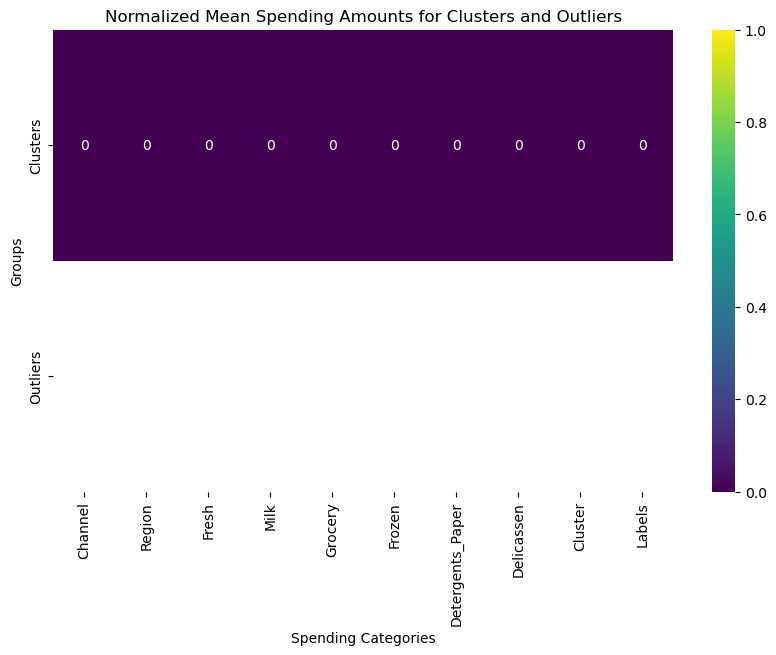

In [14]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = data.select_dtypes(include='number').columns
# Scale the numeric features using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])
data_scaled = pd.DataFrame(data_scaled, columns=numeric_columns)

# Train DBSCAN with eps=2 and min_samples=2 * n_features
dbscan = DBSCAN(eps=2, min_samples=2 * len(numeric_columns))
dbscan.fit(data_scaled)

# Add the cluster labels to the original dataset
data['Labels'] = dbscan.labels_

# Separate data into clusters and outliers
clusters = data[data['Labels'] != -1]  # Main clusters
outliers = data[data['Labels'] == -1]  # Outliers

# Calculate the mean spending amounts for each group
mean_clusters = clusters[numeric_columns].mean()
mean_outliers = outliers[numeric_columns].mean()

# Normalize the mean spending amounts using MinMaxScaler
scaler = MinMaxScaler()
mean_clusters_normalized = scaler.fit_transform(mean_clusters.values.reshape(1, -1))
mean_outliers_normalized = scaler.transform(mean_outliers.values.reshape(1, -1))

# Create DataFrames for the normalized means
mean_clusters_df = pd.DataFrame(mean_clusters_normalized, columns=numeric_columns, index=['Clusters'])
mean_outliers_df = pd.DataFrame(mean_outliers_normalized, columns=numeric_columns, index=['Outliers'])

# Concatenate DataFrames along rows
mean_normalized_df = pd.concat([mean_clusters_df, mean_outliers_df])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_normalized_df, annot=True, cmap='viridis', vmin=0, vmax=1)
plt.title('Normalized Mean Spending Amounts for Clusters and Outliers')
plt.xlabel('Spending Categories')
plt.ylabel('Groups')
plt.show()

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

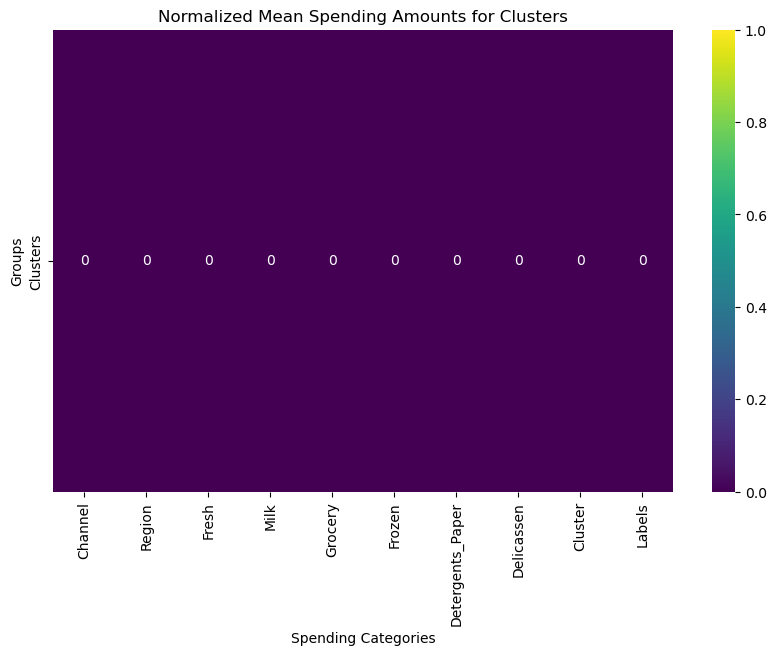

In [15]:
# Train DBSCAN with eps=2 and min_samples=2 * n_features
dbscan = DBSCAN(eps=2, min_samples=2 * len(numeric_columns))
dbscan.fit(data_scaled)

# Add the cluster labels to the original dataset
data['Labels'] = dbscan.labels_

# Separate data into clusters and outliers
clusters = data[data['Labels'] != -1]  # Main clusters

# Calculate the mean spending amounts for the clusters
mean_clusters = clusters[numeric_columns].mean()

# Normalize the mean spending amounts using MinMaxScaler
scaler = MinMaxScaler()
mean_clusters_normalized = scaler.fit_transform(mean_clusters.values.reshape(1, -1))

# Create DataFrame for the normalized means of clusters
mean_clusters_df = pd.DataFrame(mean_clusters_normalized, columns=numeric_columns, index=['Clusters'])

# Plot heatmap for clusters
plt.figure(figsize=(10, 6))
sns.heatmap(mean_clusters_df, annot=True, cmap='viridis', vmin=0, vmax=1)
plt.title('Normalized Mean Spending Amounts for Clusters')
plt.xlabel('Spending Categories')
plt.ylabel('Groups')
plt.show()

**TASK: What spending category were the two clusters mode different in?**